<a href="https://colab.research.google.com/github/cann-emma/DS1002-zgb8ts/blob/main/scripts/MasterScript.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COVID-19 DEATHS DECREASE OVERTIME AS VACCINATION DOSES INCREASE: A TIME SERIES ANALYSIS**

In [1]:
## Libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from statsmodels.tsa.stattools import ccf
from scipy.stats import pearsonr
from statsmodels.tsa.stattools import grangercausalitytests

### COVID-19 DEATHS DATA CLEANING

In [2]:
url = 'https://raw.githubusercontent.com/carolinehagood/covid-project/refs/heads/main/data/COVID-19_Death_Counts.csv'
df = pd.read_csv(url)
df.head()

,Data as of,Start Date,End Date,Group,Year,Month,MMWR Week,Week Ending Date,State,COVID-19 Deaths,Total Deaths,Percent of Expected Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,10/03/2024,12/29/2019,01/04/2020,By Week,2020,NaN,1.0,01/04/2020,United States,0.0,60170.0,98.0,4111.0,0.0,434.0,4545.0,NaN
1,10/03/2024,01/05/2020,01/11/2020,By Week,2020,NaN,2.0,01/11/2020,United States,1.0,60734.0,97.0,4153.0,1.0,475.0,4628.0,NaN
2,10/03/2024,01/12/2020,01/18/2020,By Week,2020,NaN,3.0,01/18/2020,United States,2.0,59362.0,98.0,4066.0,2.0,468.0,4534.0,NaN
3,10/03/2024,01/19/2020,01/25/2020,By Week,2020,NaN,4.0,01/25/2020,United States,3.0,59162.0,99.0,3915.0,0.0,500.0,4418.0,NaN
4,10/03/2024,01/26/2020,02/01/2020,By Week,2020,NaN,5.0,02/01/2020,United States,0.0,58834.0,99.0,3818.0,0.0,481.0,4299.0,NaN


In [3]:
print(df.shape)
print(df.describe())

(16794, 17)
             Month     MMWR Week  COVID-19 Deaths  Total Deaths  \
count  3078.000000  13392.000000     1.377100e+04  1.679300e+04   
mean      6.263158     25.584677     7.030020e+02  7.400347e+03   
std       3.374995     14.747642     1.216949e+04  1.343265e+05   
min       1.000000      1.000000     0.000000e+00  1.200000e+01   
25%       3.000000     13.000000     2.300000e+01  4.900000e+02   
50%       6.000000     25.000000     5.700000e+01  1.082000e+03   
75%       9.000000     38.000000     1.800000e+02  2.255000e+03   
max      12.000000     53.000000     1.208368e+06  1.544822e+07   

       Percent of Expected Deaths  Pneumonia Deaths  \
count                16740.000000      1.566600e+04   
mean                   114.397133      6.973944e+02   
std                     18.320154      1.237954e+04   
min                      1.000000      0.000000e+00   
25%                    105.000000      4.100000e+01   
50%                    112.000000      8.400000e+01   

In [4]:
#Data initialy had two rows that were messing with the rest of the data set.
#Resolved this manually in the terminal and editing the file, and then reuploading it
#This line of code confirms that the column names are now correct
column_names = df.columns
print(column_names)


Index(['Data as of', 'Start Date', 'End Date', 'Group', 'Year', 'Month',
       'MMWR Week', 'Week Ending Date', 'State', 'COVID-19 Deaths',
       'Total Deaths', 'Percent of Expected Deaths', 'Pneumonia Deaths',
       'Pneumonia and COVID-19 Deaths', 'Influenza Deaths',
       'Pneumonia, Influenza, or COVID-19 Deaths', 'Footnote'],
      dtype='object')


In [5]:
df['State'].unique()

array(['United States', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'New York City', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming', 'Puerto Rico'], dtype=object)

In [6]:
#Delete all rows in which the state variable is not named "United States"
df = df[df['State'] == 'United States']
df = df[df['Group'] == 'By Week']
df.tail()

,Data as of,Start Date,End Date,Group,Year,Month,MMWR Week,Week Ending Date,State,COVID-19 Deaths,Total Deaths,Percent of Expected Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
243,10/03/2024,08/25/2024,08/31/2024,By Week,2024,NaN,35.0,08/31/2024,United States,1288.0,53575.0,105.0,2983.0,467.0,32.0,3833.0,NaN
244,10/03/2024,09/01/2024,09/07/2024,By Week,2024,NaN,36.0,09/07/2024,United States,1123.0,51560.0,101.0,2968.0,445.0,26.0,3668.0,NaN
245,10/03/2024,09/08/2024,09/14/2024,By Week,2024,NaN,37.0,09/14/2024,United States,1063.0,47561.0,92.0,2636.0,421.0,22.0,3300.0,NaN
246,10/03/2024,09/15/2024,09/21/2024,By Week,2024,NaN,38.0,09/21/2024,United States,767.0,39186.0,76.0,2249.0,323.0,31.0,2723.0,NaN
247,10/03/2024,09/22/2024,09/28/2024,By Week,2024,NaN,39.0,09/28/2024,United States,447.0,23248.0,45.0,1303.0,178.0,17.0,1587.0,NaN


In [7]:
print(df.shape)
print(df.describe())

(248, 17)
       Month   MMWR Week  COVID-19 Deaths  Total Deaths  \
count    0.0  248.000000       248.000000    248.000000   
mean     NaN   25.584677      4872.451613  62392.661290   
std      NaN   14.776914      5727.352333   7854.101993   
min      NaN    1.000000         0.000000  23248.000000   
25%      NaN   13.000000      1240.250000  57963.000000   
50%      NaN   25.000000      2405.500000  59946.500000   
75%      NaN   38.000000      6417.500000  66023.500000   
max      NaN   53.000000     26028.000000  87415.000000   

       Percent of Expected Deaths  Pneumonia Deaths  \
count                  248.000000        248.000000   
mean                   114.447581       5470.383065   
std                     12.113384       3155.717917   
min                     45.000000       1303.000000   
25%                    107.000000       3526.000000   
50%                    111.000000       4088.500000   
75%                    119.000000       6144.000000   
max               

In [8]:
#Ensuring that there is only one unique value, United States, within the state variable. and one Unique Group variable
unique_states_count = df['State'].nunique()
print(unique_states_count)
print(df['Group'].unique())

1
['By Week']


In [9]:
#Taking out unnessary columns to make the data set smaller, and renaming MMWR Week to just Week for clarity
df.rename(columns={'MMWR Week': 'Week'}, inplace=True)
df = df[['Start Date', 'End Date', 'Year', 'Week', 'COVID-19 Deaths' ]]
df.head()

,Start Date,End Date,Year,Week,COVID-19 Deaths
0,12/29/2019,01/04/2020,2020,1.0,0.0
1,01/05/2020,01/11/2020,2020,2.0,1.0
2,01/12/2020,01/18/2020,2020,3.0,2.0
3,01/19/2020,01/25/2020,2020,4.0,3.0
4,01/26/2020,02/01/2020,2020,5.0,0.0


In [10]:
# How many missing values are in clean data for week variable?
df['Week'].isna().sum()

0

In [11]:
#vaccine data only goes to end of 2022, and so remove values that exceed that time frame
df = df[~df['Year'].isin(['2023', '2024'])]
df.tail()

,Start Date,End Date,Year,Week,COVID-19 Deaths
152,11/27/2022,12/03/2022,2022,48.0,2599.0
153,12/04/2022,12/10/2022,2022,49.0,3042.0
154,12/11/2022,12/17/2022,2022,50.0,3194.0
155,12/18/2022,12/24/2022,2022,51.0,3325.0
156,12/25/2022,12/31/2022,2022,52.0,3668.0


In [12]:

#Need to make 'Year' a float, which requires extracting a single year from values that have weeks between 2 years
non_numeric = df[~df['Year'].str.replace(',', '').str.isnumeric()]
print(non_numeric)


Empty DataFrame
Columns: [Start Date, End Date, Year, Week, COVID-19 Deaths]
Index: []


### COVID-19 DEATHS DATA VISUALIZATION

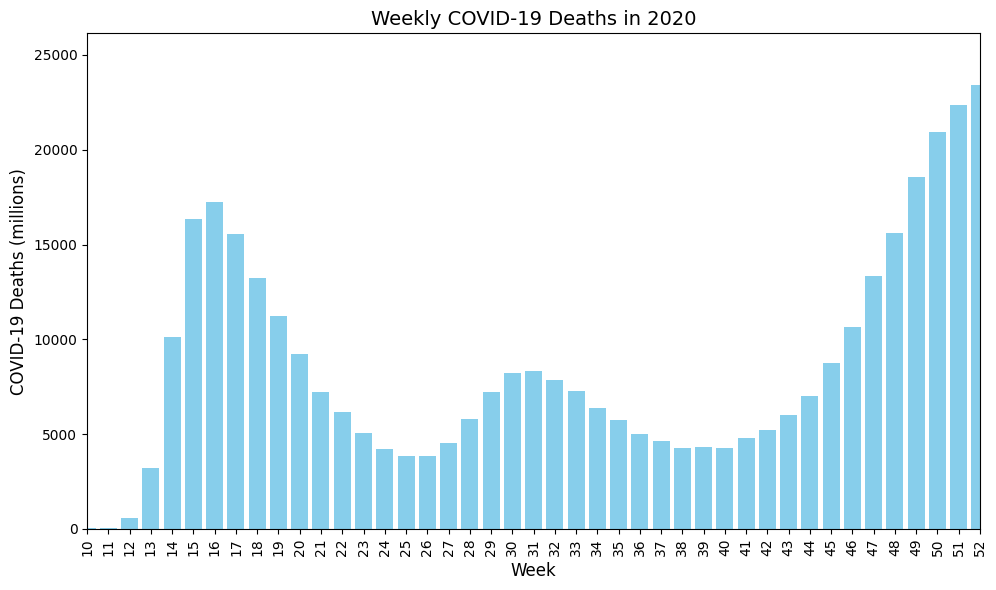

In [13]:
# Filter the data for the year 2020
df_2020 = df[(df['Year'] == '2020')]
weekly_deaths = df_2020.groupby('Week')['COVID-19 Deaths'].sum()

# Create a histogram for the weekly COVID-19 deaths
plt.figure(figsize=(10,6))
plt.bar(weekly_deaths.index, weekly_deaths.values, color='skyblue')
# Add titles and labels
plt.title('Weekly COVID-19 Deaths in 2020', fontsize=14)
plt.xlabel('Week', fontsize=12)
plt.ylabel('COVID-19 Deaths (millions)', fontsize=12)
# Display the plot
plt.xticks(weekly_deaths.index, rotation=90)
plt.tight_layout()
plt.xlim([10, 52])
plt.show()

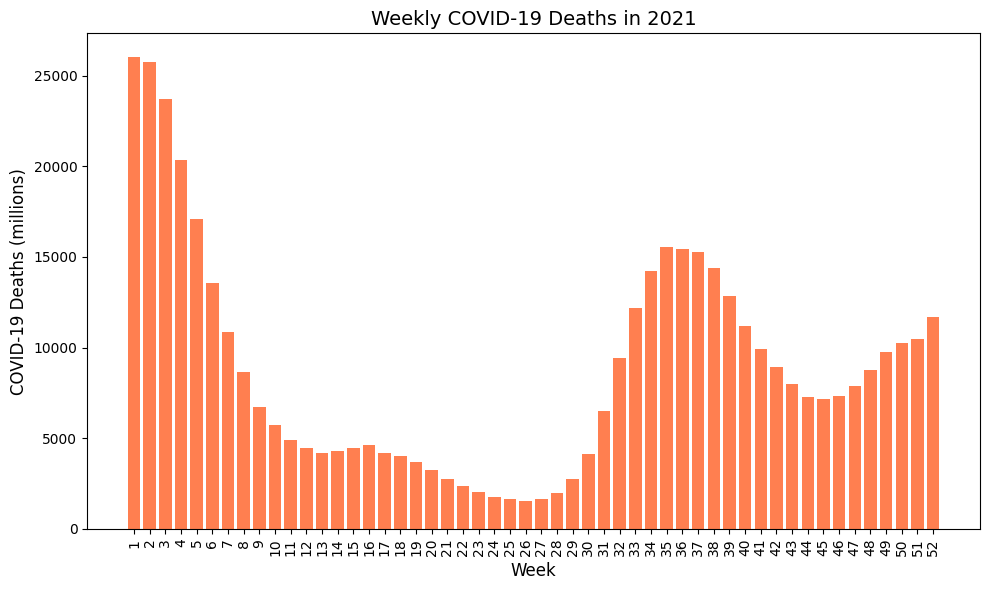

In [14]:
# Filter the data for the year 2021
df_2021 = df[(df['Year'] == '2021')]
weekly_deaths = df_2021.groupby('Week')['COVID-19 Deaths'].sum()

# Create a histogram for the weekly COVID-19 deaths
plt.figure(figsize=(10,6))
plt.bar(weekly_deaths.index, weekly_deaths.values, color='coral')
# Add titles and labels
plt.title('Weekly COVID-19 Deaths in 2021', fontsize=14)
plt.xlabel('Week', fontsize=12)
plt.ylabel('COVID-19 Deaths (millions)', fontsize=12)
# Display the plot
plt.xticks(weekly_deaths.index, rotation=90)
plt.tight_layout()
plt.show()

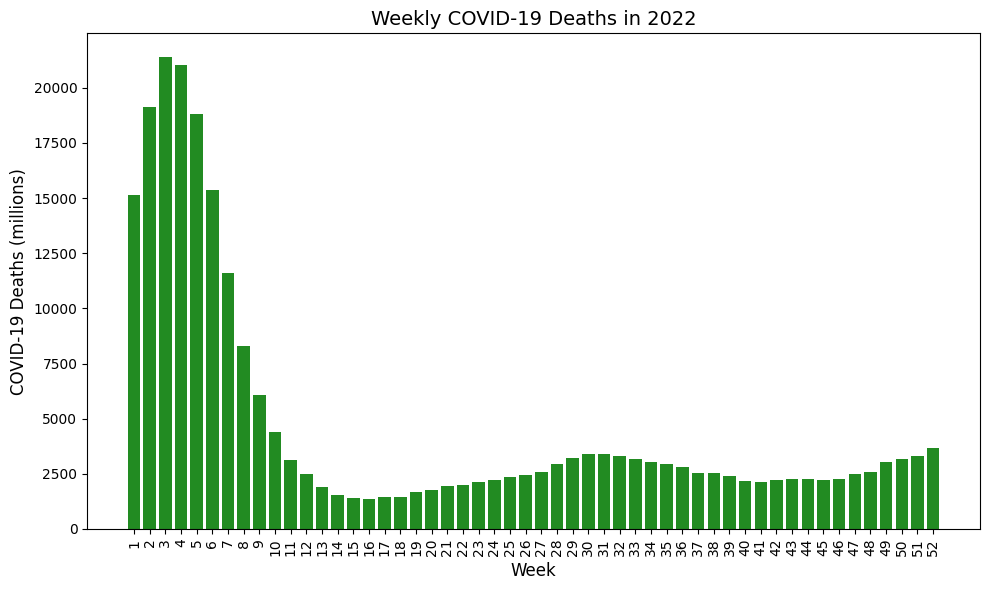

In [15]:
# Filter the data for the year 2022
df_2022 = df[(df['Year'] == '2022')]
weekly_deaths = df_2022.groupby('Week')['COVID-19 Deaths'].sum()

# Create a histogram for the weekly COVID-19 deaths
plt.figure(figsize=(10,6))
plt.bar(weekly_deaths.index, weekly_deaths.values, color='forestgreen')
# Add titles and labels
plt.title('Weekly COVID-19 Deaths in 2022', fontsize=14)
plt.xlabel('Week', fontsize=12)
plt.ylabel('COVID-19 Deaths (millions)', fontsize=12)
# Display the plot
plt.xticks(weekly_deaths.index, rotation=90)  # Rotating x-axis labels for better readability
plt.tight_layout()
plt.show()


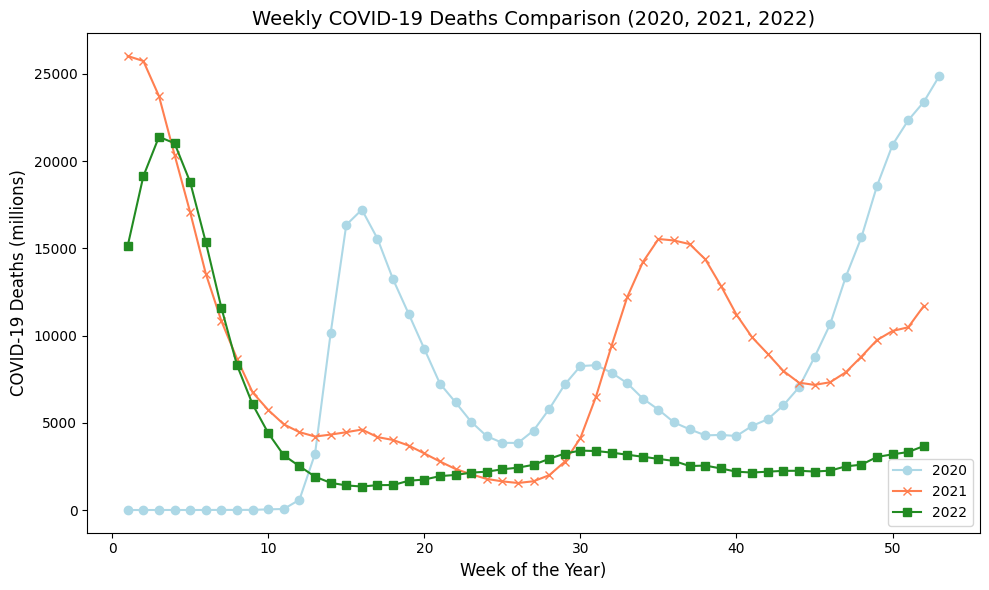

In [16]:
#line graph comparing weekly death rates accross three years; 2020, 2021, and 2022
# Sort each DataFrame by 'Week' to ensure proper plotting
df_2020 = df_2020.sort_values('Week')
df_2021 = df_2021.sort_values('Week')
df_2022 = df_2022.sort_values('Week')

# Plotting the data for 2020, 2021, and 2022
plt.figure(figsize=(10, 6))

# Plot for 2020
plt.plot(df_2020['Week'], df_2020['COVID-19 Deaths'], label='2020', color='lightblue', linestyle='-', marker='o')

# Plot for 2021
plt.plot(df_2021['Week'], df_2021['COVID-19 Deaths'], label='2021', color='coral', linestyle='-', marker='x')

# Plot for 2022
plt.plot(df_2022['Week'], df_2022['COVID-19 Deaths'], label='2022', color='forestgreen', linestyle='-', marker='s')

# Add titles and labels
plt.title('Weekly COVID-19 Deaths Comparison (2020, 2021, 2022)', fontsize=14)
plt.xlabel('Week of the Year)', fontsize=12)
plt.ylabel('COVID-19 Deaths (millions)', fontsize=12)

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [17]:
# Concatenate the data for all three years
df_all = pd.concat([df_2020, df_2021, df_2022])
# Sort the combined DataFrame by 'Year' and 'Week'
df_all = df_all.sort_values(by=['Year', 'Week'])
df_all['Year']= df_all['Year'].astype(float)
# Create a continuous 'Week_Number' for plotting (52 weeks for each year)
# This ensures that weeks for 2021 and 2022 flow sequentially
df_all['Week_Number'] = df_all['Week'] + (df_all['Year'] - 2020) * 52

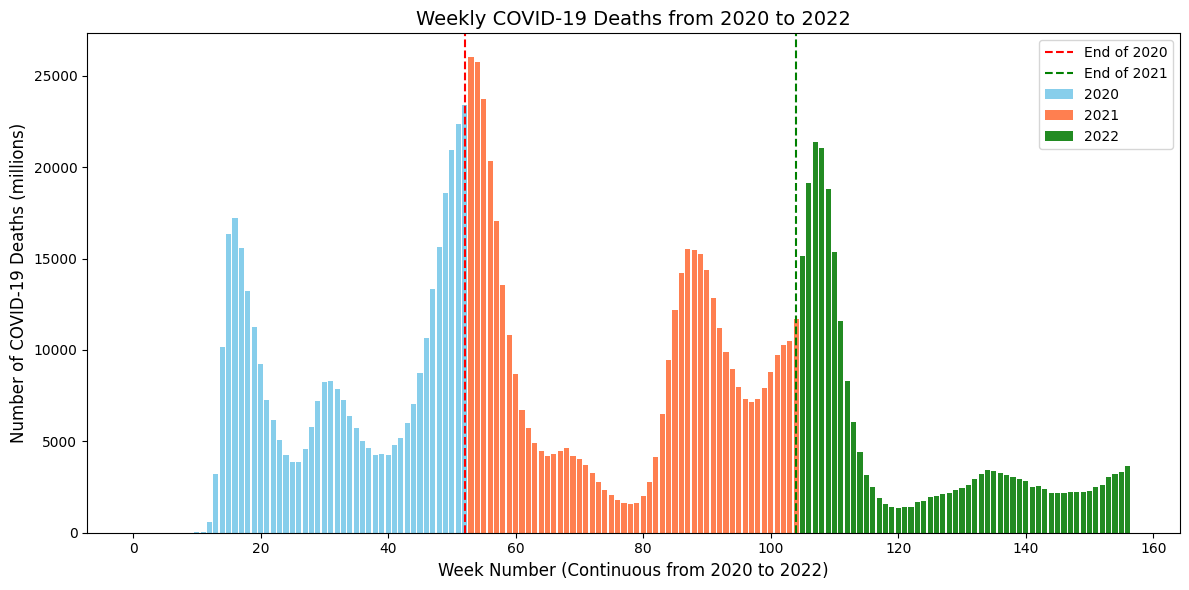

In [18]:
# Create the bar plot
plt.figure(figsize=(12, 6))

# Plot the data for 2020
plt.bar(df_all[df_all['Year'] == 2020]['Week_Number'],
        df_all[df_all['Year'] == 2020]['COVID-19 Deaths'],
        color='skyblue', label='2020')

# Plot the data for 2021
plt.bar(df_all[df_all['Year'] == 2021]['Week_Number'],
        df_all[df_all['Year'] == 2021]['COVID-19 Deaths'],
        color='coral', label='2021')

# Plot the data for 2022
plt.bar(df_all[df_all['Year'] == 2022]['Week_Number'],
        df_all[df_all['Year'] == 2022]['COVID-19 Deaths'],
        color='forestgreen', label='2022')

# Add vertical lines to indicate year changes
plt.axvline(x=52, color='red', linestyle='--', label='End of 2020')
plt.axvline(x=104, color='green', linestyle='--', label='End of 2021')

# Add titles and labels
plt.title('Weekly COVID-19 Deaths from 2020 to 2022', fontsize=14)
plt.xlabel('Week Number (Continuous from 2020 to 2022)', fontsize=12)
plt.ylabel('Number of COVID-19 Deaths (millions)', fontsize=12)

# Add legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

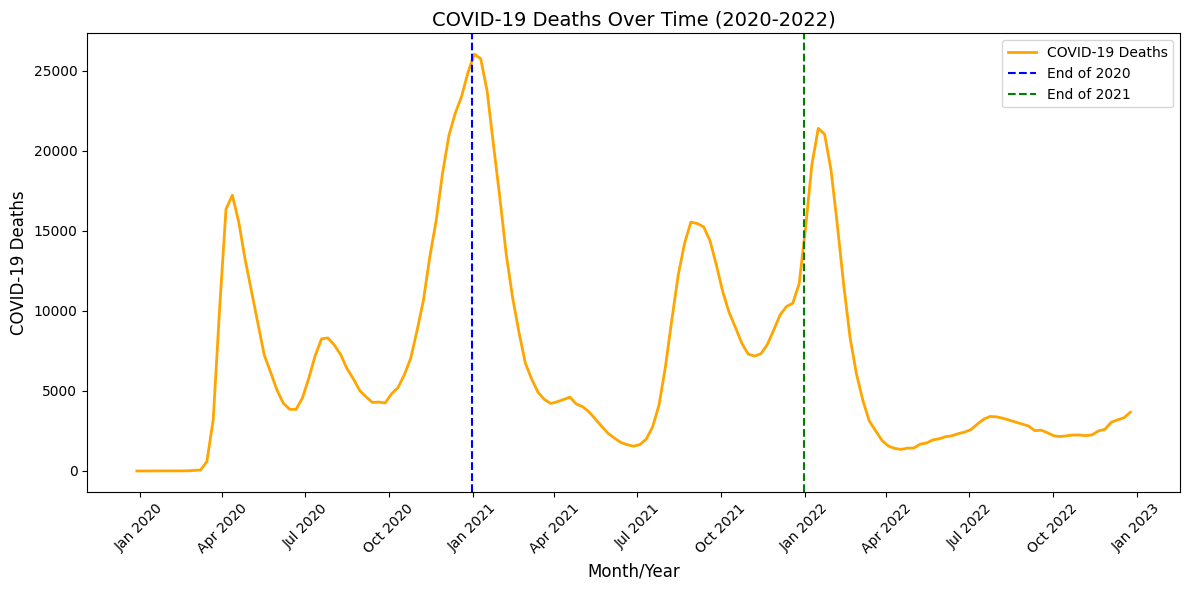

In [19]:
# Ensure the 'End_Date' column is in datetime format
df_all['Start Date'] = pd.to_datetime(df_all['Start Date'])

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the COVID-19 deaths
plt.plot(df_all['Start Date'], df_all['COVID-19 Deaths'],
         color='orange', linewidth=2, label='COVID-19 Deaths')

# Add vertical lines to mark the end of each year
plt.axvline(x=pd.Timestamp('2020-12-31'), color='blue', linestyle='--', label='End of 2020')
plt.axvline(x=pd.Timestamp('2021-12-31'), color='green', linestyle='--', label='End of 2021')

# Set the x-axis to display every three months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

# Add titles and labels
plt.title("COVID-19 Deaths Over Time (2020-2022)", fontsize=14)
plt.xlabel("Month/Year", fontsize=12)
plt.ylabel("COVID-19 Deaths", fontsize=12)

# Show the legend
plt.legend()

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

### VACCINE DATA CLEANING

In [20]:
#open and read csv file
url = "https://raw.githubusercontent.com/carolinehagood/covid-project/refs/heads/main/data/Vaccination-data-CDC.csv"
df = pd.read_csv(url)
df.head(5)

,Date,date_type,MMWR_week,Location,Administered_Daily,Administered_Cumulative,Administered_7_Day_Rolling_Average,Admin_Dose_1_Daily,Admin_Dose_1_Cumulative,Admin_Dose_1_Day_Rolling_Average,Administered_Dose1_Pop_Pct,Administered_daily_change_report,Series_Complete_Daily,Series_Complete_Cumulative,Series_Complete_Pop_Pct,Booster_Daily,Booster_Cumulative,Additional_Doses_Vax_Pct,Bivalent_Booster_Daily,Bivalent_Booster_Cumulative
0,05/10/2023,Report,19,CO,15097,13033446,NaN,1527,4837792,NaN,84.0,NaN,1218,4248431,73.8,1569,2460212,57.9,9725,1272115
1,05/10/2023,Report,19,AZ,16505,14647405,NaN,2955,5704677,NaN,78.4,NaN,1101,4821350,66.2,1401,2418342,50.2,11388,1148060
2,05/10/2023,Report,19,MN,16020,12829141,NaN,1282,4461994,NaN,79.1,NaN,932,4082263,72.4,1698,2595884,63.6,5497,1510743
3,05/10/2023,Report,19,ID,3526,2894361,NaN,323,1146055,NaN,64.1,NaN,267,1012257,56.6,333,494214,48.8,2032,248989
4,05/10/2023,Report,19,DC,31,2137377,NaN,264,836680,NaN,95.0,NaN,212,644085,91.3,196,330888,51.4,509,226857


In [21]:
#drop column Code, since it is not relevant
df = df.drop(columns=['Administered_7_Day_Rolling_Average', 'Admin_Dose_1_Day_Rolling_Average',
                      'Administered_daily_change_report', 'Series_Complete_Pop_Pct', 'MMWR_week'])

In [22]:
df.head(5)

,Date,date_type,Location,Administered_Daily,Administered_Cumulative,Admin_Dose_1_Daily,Admin_Dose_1_Cumulative,Administered_Dose1_Pop_Pct,Series_Complete_Daily,Series_Complete_Cumulative,Booster_Daily,Booster_Cumulative,Additional_Doses_Vax_Pct,Bivalent_Booster_Daily,Bivalent_Booster_Cumulative
0,05/10/2023,Report,CO,15097,13033446,1527,4837792,84.0,1218,4248431,1569,2460212,57.9,9725,1272115
1,05/10/2023,Report,AZ,16505,14647405,2955,5704677,78.4,1101,4821350,1401,2418342,50.2,11388,1148060
2,05/10/2023,Report,MN,16020,12829141,1282,4461994,79.1,932,4082263,1698,2595884,63.6,5497,1510743
3,05/10/2023,Report,ID,3526,2894361,323,1146055,64.1,267,1012257,333,494214,48.8,2032,248989
4,05/10/2023,Report,DC,31,2137377,264,836680,95.0,212,644085,196,330888,51.4,509,226857


In [23]:
#filter data to exclude data per state, and only include total national data for each day
df_filtered = df[(df['Location'] == 'US') & (df['date_type'] == 'Admin')]
df_filtered.head(5)

,Date,date_type,Location,Administered_Daily,Administered_Cumulative,Admin_Dose_1_Daily,Admin_Dose_1_Cumulative,Administered_Dose1_Pop_Pct,Series_Complete_Daily,Series_Complete_Cumulative,Booster_Daily,Booster_Cumulative,Additional_Doses_Vax_Pct,Bivalent_Booster_Daily,Bivalent_Booster_Cumulative
109,05/09/2023,Admin,US,11751,676728782,1467,270227181,81.4,951,230637348,1478,118438297,51.4,7983,56478510
175,05/08/2023,Admin,US,55634,676717031,6965,270225714,81.4,3258,230636397,5526,118436819,51.4,32829,56470527
180,05/07/2023,Admin,US,21386,676661397,3996,270218749,81.4,1075,230633139,1650,118431293,51.4,13136,56437698
248,05/06/2023,Admin,US,40672,676640011,5756,270214753,81.4,2203,230632064,3668,118429643,51.4,25273,56424562
357,05/05/2023,Admin,US,105724,676599339,11810,270208997,81.4,6011,230629861,9932,118425975,51.3,62472,56399289


In [24]:
df_filtered = df_filtered.drop(columns=['Location', 'date_type'])
df_filtered.head(5)

,Date,Administered_Daily,Administered_Cumulative,Admin_Dose_1_Daily,Admin_Dose_1_Cumulative,Administered_Dose1_Pop_Pct,Series_Complete_Daily,Series_Complete_Cumulative,Booster_Daily,Booster_Cumulative,Additional_Doses_Vax_Pct,Bivalent_Booster_Daily,Bivalent_Booster_Cumulative
109,05/09/2023,11751,676728782,1467,270227181,81.4,951,230637348,1478,118438297,51.4,7983,56478510
175,05/08/2023,55634,676717031,6965,270225714,81.4,3258,230636397,5526,118436819,51.4,32829,56470527
180,05/07/2023,21386,676661397,3996,270218749,81.4,1075,230633139,1650,118431293,51.4,13136,56437698
248,05/06/2023,40672,676640011,5756,270214753,81.4,2203,230632064,3668,118429643,51.4,25273,56424562
357,05/05/2023,105724,676599339,11810,270208997,81.4,6011,230629861,9932,118425975,51.3,62472,56399289


In [25]:
df_filtered.isna().sum()

,0
Date,0
Administered_Daily,0
Administered_Cumulative,0
Admin_Dose_1_Daily,0
Admin_Dose_1_Cumulative,0
Administered_Dose1_Pop_Pct,0
Series_Complete_Daily,0
Series_Complete_Cumulative,0
Booster_Daily,0
Booster_Cumulative,0


In [26]:
# What is the range of Day variable?
print(df_filtered['Date'].max())
print(df_filtered['Date'].min())

12/31/2022
01/01/2021


In [27]:
# Convert Day to Date Time
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])
df_filtered['Year'] = df_filtered['Date'].dt.year

In [28]:
# Extract the week number
df_filtered['Week'] = df_filtered['Date'].dt.isocalendar().week
df_filtered.head(5)

,Date,Administered_Daily,Administered_Cumulative,Admin_Dose_1_Daily,Admin_Dose_1_Cumulative,Administered_Dose1_Pop_Pct,Series_Complete_Daily,Series_Complete_Cumulative,Booster_Daily,Booster_Cumulative,Additional_Doses_Vax_Pct,Bivalent_Booster_Daily,Bivalent_Booster_Cumulative,Year,Week
109,2023-05-09,11751,676728782,1467,270227181,81.4,951,230637348,1478,118438297,51.4,7983,56478510,2023,19
175,2023-05-08,55634,676717031,6965,270225714,81.4,3258,230636397,5526,118436819,51.4,32829,56470527,2023,19
180,2023-05-07,21386,676661397,3996,270218749,81.4,1075,230633139,1650,118431293,51.4,13136,56437698,2023,18
248,2023-05-06,40672,676640011,5756,270214753,81.4,2203,230632064,3668,118429643,51.4,25273,56424562,2023,18
357,2023-05-05,105724,676599339,11810,270208997,81.4,6011,230629861,9932,118425975,51.3,62472,56399289,2023,18


In [29]:
df_filtered['Date'].dtypes

dtype('<M8[ns]')

In [30]:
print(df_filtered.columns)

Index(['Date', 'Administered_Daily', 'Administered_Cumulative',
       'Admin_Dose_1_Daily', 'Admin_Dose_1_Cumulative',
       'Administered_Dose1_Pop_Pct', 'Series_Complete_Daily',
       'Series_Complete_Cumulative', 'Booster_Daily', 'Booster_Cumulative',
       'Additional_Doses_Vax_Pct', 'Bivalent_Booster_Daily',
       'Bivalent_Booster_Cumulative', 'Year', 'Week'],
      dtype='object')


In [31]:
df_filtered.sort_values('Date', inplace=True)

weekly_data = df_filtered.resample('W-SAT', on='Date', origin='2019-12-29').sum()

weekly_summary = pd.DataFrame({
    'Start_Date': weekly_data.index - pd.to_timedelta(6, unit='d'),
    'End_Date': weekly_data.index,
    'Total_Doses': weekly_data['Administered_Daily'],
})

weekly_summary.reset_index(drop=True, inplace=True)

print(weekly_summary)

    Start_Date   End_Date  Total_Doses
0   2020-12-13 2020-12-19      1139003
1   2020-12-20 2020-12-26      1878155
2   2020-12-27 2021-01-02      3105966
3   2021-01-03 2021-01-09      5613572
4   2021-01-10 2021-01-16      7179128
..         ...        ...          ...
121 2023-04-09 2023-04-15       269637
122 2023-04-16 2023-04-22       321440
123 2023-04-23 2023-04-29       510107
124 2023-04-30 2023-05-06       556484
125 2023-05-07 2023-05-13        88771

[126 rows x 3 columns]


In [32]:
weekly_summary.head(25)

,Start_Date,End_Date,Total_Doses
0,2020-12-13,2020-12-19,1139003
1,2020-12-20,2020-12-26,1878155
2,2020-12-27,2021-01-02,3105966
3,2021-01-03,2021-01-09,5613572
4,2021-01-10,2021-01-16,7179128
5,2021-01-17,2021-01-23,8371239
6,2021-01-24,2021-01-30,10315441
7,2021-01-31,2021-02-06,11781298
8,2021-02-07,2021-02-13,12835915
9,2021-02-14,2021-02-20,10537483


In [33]:
weekly_summary['Week'] = weekly_summary['End_Date'].dt.isocalendar().week
weekly_summary['Week']= weekly_summary['Week'].astype(float)

In [34]:
weekly_summary

,Start_Date,End_Date,Total_Doses,Week
0,2020-12-13,2020-12-19,1139003,51.0
1,2020-12-20,2020-12-26,1878155,52.0
2,2020-12-27,2021-01-02,3105966,53.0
3,2021-01-03,2021-01-09,5613572,1.0
4,2021-01-10,2021-01-16,7179128,2.0
...,...,...,...,...
121,2023-04-09,2023-04-15,269637,15.0
122,2023-04-16,2023-04-22,321440,16.0
123,2023-04-23,2023-04-29,510107,17.0
124,2023-04-30,2023-05-06,556484,18.0


### VACCINE DATA VISUALIZATION

In [35]:
# Filter by year and sort values by week
df_2020= df_filtered[df_filtered['Year']== '2020'].sort_values('Week')
df_2021= df_filtered[df_filtered['Year']== '2021'].sort_values('Week')
df_2022= df_filtered[df_filtered['Year']== '2022'].sort_values('Week')

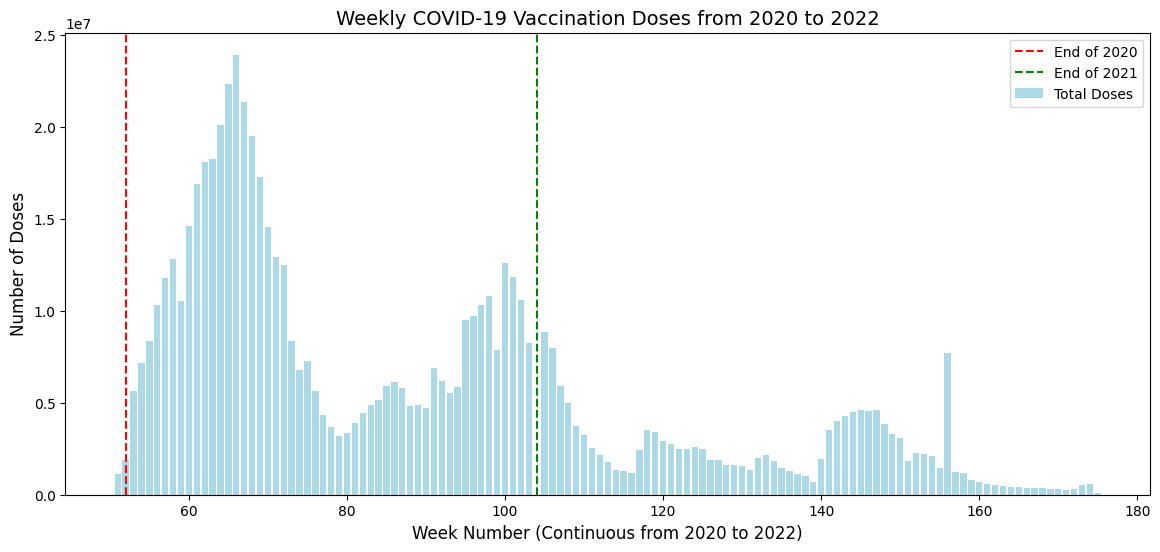

In [36]:
plt.figure(figsize=(14, 6))

# Bar plot for all years with continuous week numbering
plt.bar(weekly_summary['Week'] + (weekly_summary['End_Date'].dt.year - 2020) * 52,
        weekly_summary['Total_Doses'], color='lightblue', label='Total Doses')

# Add vertical lines to mark the end of each year
plt.axvline(x=52, color='red', linestyle='--', label='End of 2020')
plt.axvline(x=104, color='green', linestyle='--', label='End of 2021')

# Add titles and labels
plt.title("Weekly COVID-19 Vaccination Doses from 2020 to 2022", fontsize=14)
plt.xlabel("Week Number (Continuous from 2020 to 2022)", fontsize=12)
plt.ylabel("Number of Doses", fontsize=12)

# Show legend
plt.legend()

# Display the plot
plt.show()

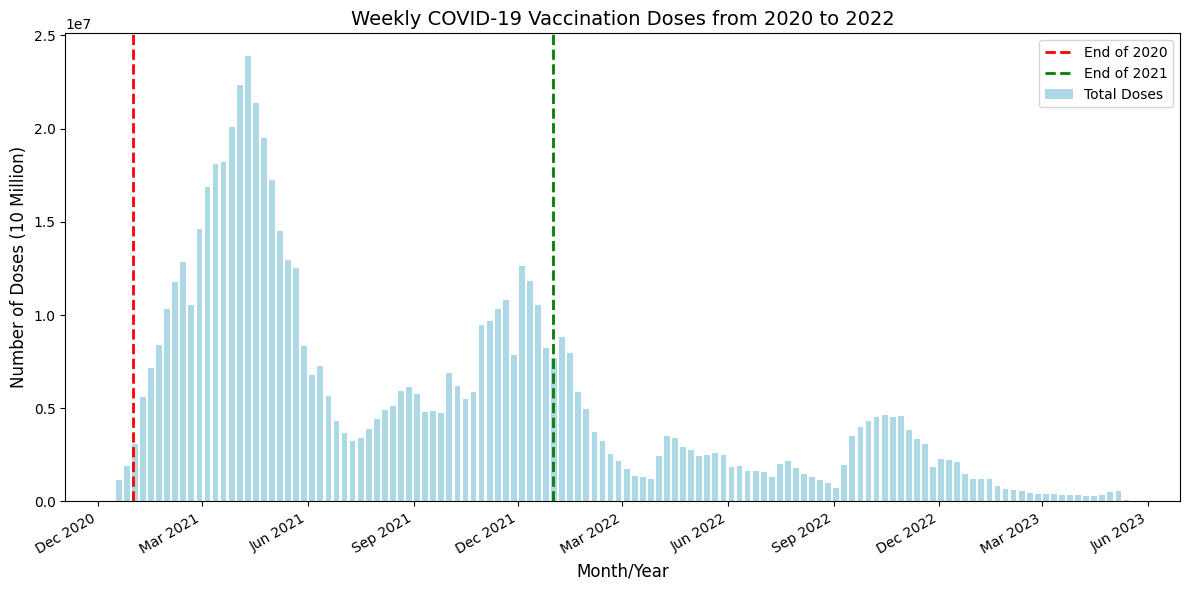

In [37]:
import matplotlib.dates as mdates

weekly_summary['Date'] = pd.to_datetime(weekly_summary['End_Date'])

plt.figure(figsize=(12, 6))
plt.bar(weekly_summary['Date'],
        weekly_summary['Total_Doses'], color='lightblue', label='Total Doses', width=5)

# Add vertical lines to mark the end of each year
plt.axvline(x=pd.Timestamp('2020-12-31'), color='red', linestyle='--', linewidth=2, label='End of 2020')
plt.axvline(x=pd.Timestamp('2021-12-31'), color='green', linestyle='--', linewidth=2, label='End of 2021')

# Add titles and labels
plt.title("Weekly COVID-19 Vaccination Doses from 2020 to 2022", fontsize=14)
plt.xlabel("Month/Year", fontsize=12)
plt.ylabel("Number of Doses (10 Million)", fontsize=12)

# Format the x-axis to show every three months (quarterly)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Set major ticks to every 3 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format the ticks to show month and year

plt.gcf().autofmt_xdate()

# Show legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

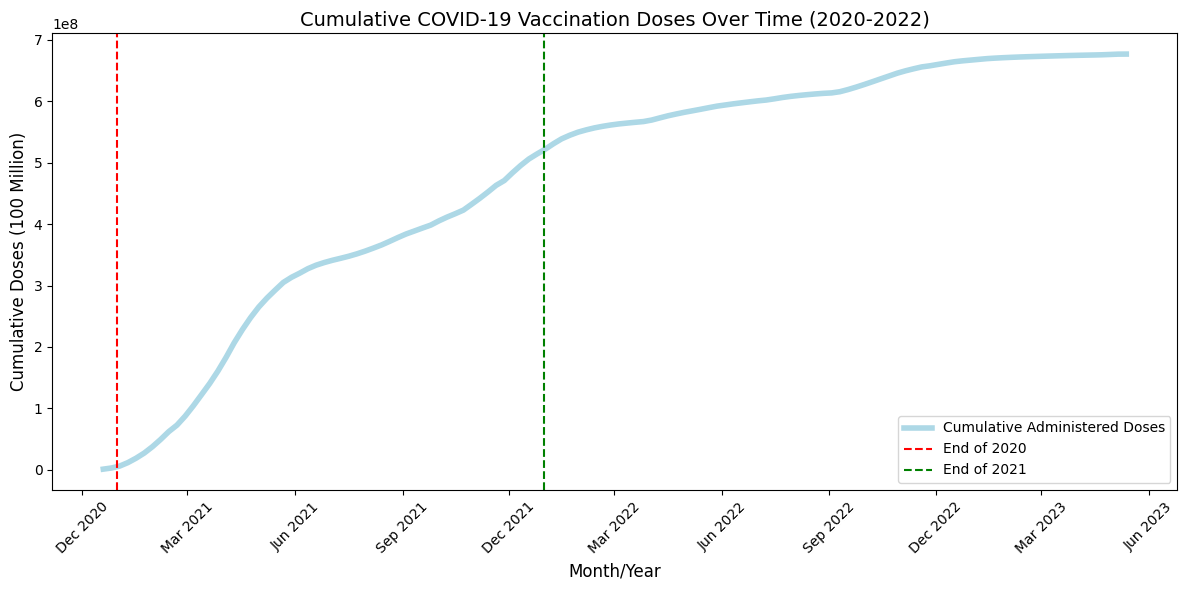

In [38]:
#Line graph of cummulative doses overtime
# Add a new column 'doses_cumulative' that represents the cumulative sum of doses
weekly_summary['doses_cumulative'] = weekly_summary['Total_Doses'].cumsum()

plt.figure(figsize=(12, 6))
plt.plot(weekly_summary['End_Date'], weekly_summary['doses_cumulative'],
         color='lightblue', linewidth=4, label='Cumulative Administered Doses')

# Add vertical lines to mark the end of each year
plt.axvline(x=pd.Timestamp('2020-12-31'), color='red', linestyle='--', label='End of 2020')
plt.axvline(x=pd.Timestamp('2021-12-31'), color='green', linestyle='--', label='End of 2021')

# Set the x-axis to display every three months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

# Add titles and labels
plt.title("Cumulative COVID-19 Vaccination Doses Over Time (2020-2022)", fontsize=14)
plt.xlabel("Month/Year", fontsize=12)
plt.ylabel("Cumulative Doses (100 Million)", fontsize=12)

# Show the legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

### COMBINING COVID-19 DEATHS AND VACCINE DATASETS

In [39]:
url = "https://raw.githubusercontent.com/carolinehagood/covid-project/refs/heads/main/data/vaccine_data_cleaned.csv"
vaccine_df = pd.read_csv(url)

url = "https://raw.githubusercontent.com/carolinehagood/covid-project/refs/heads/main/data/Covid_deaths_cleaned.csv"
deaths_df = pd.read_csv(url)

deaths_df.rename(columns={'Start Date': 'Start_Date'}, inplace=True)
deaths_df.rename(columns={'End Date': 'End_Date'}, inplace=True)
vaccine_df.drop(columns=['Unnamed: 0'], inplace=True)
vaccine_df.head()

,Start_Date,End_Date,Total_Doses,Week
0,2020-12-13,2020-12-19,1139003,51.0
1,2020-12-20,2020-12-26,1878155,52.0
2,2020-12-27,2021-01-02,3105966,53.0
3,2021-01-03,2021-01-09,5613572,1.0
4,2021-01-10,2021-01-16,7179128,2.0


In [40]:
deaths_df.head()

,Start_Date,End_Date,Year,Week,COVID-19 Deaths
0,12/29/2019,01/04/2020,2020,1.0,0.0
1,01/05/2020,01/11/2020,2020,2.0,1.0
2,01/12/2020,01/18/2020,2020,3.0,2.0
3,01/19/2020,01/25/2020,2020,4.0,3.0
4,01/26/2020,02/01/2020,2020,5.0,0.0


In [41]:
# Convert date columns to datetime if they aren't already
deaths_df['Start_Date'] = pd.to_datetime(deaths_df['Start_Date'])
deaths_df['End_Date'] = pd.to_datetime(deaths_df['End_Date'])
vaccine_df['Start_Date'] = pd.to_datetime(vaccine_df['Start_Date'])
vaccine_df['End_Date'] = pd.to_datetime(vaccine_df['End_Date'])

# Merge the DataFrames, using 'start_date' and 'end_date' to align rows
merged_df = pd.merge(deaths_df, vaccine_df[['Start_Date', 'End_Date', 'Total_Doses']],
                      on=['Start_Date', 'End_Date'], how='left')

# Fill NaN values in the 'Total_Doses' column with 0
merged_df['Total_Doses'].fillna(0, inplace=True)

# Display the rows where vaccines start
print(merged_df.iloc[49:56])

   Start_Date   End_Date  Year  Week  COVID-19 Deaths  Total_Doses
49 2020-12-06 2020-12-12  2020  50.0          20940.0          0.0
50 2020-12-13 2020-12-19  2020  51.0          22342.0    1139003.0
51 2020-12-20 2020-12-26  2020  52.0          23399.0    1878155.0
52 2020-12-27 2021-01-02  2020  53.0          24895.0    3105966.0
53 2021-01-03 2021-01-09  2021   1.0          26028.0    5613572.0
54 2021-01-10 2021-01-16  2021   2.0          25743.0    7179128.0
55 2021-01-17 2021-01-23  2021   3.0          23734.0    8371239.0


<ipython-input-41-f3e05fbfb352>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Total_Doses'].fillna(0, inplace=True)


In [42]:
#Adding variable with cumulative vaccines
merged_df['Doses_Cumulative'] = merged_df['Total_Doses'].cumsum()
print(merged_df.iloc[49:56])

   Start_Date   End_Date  Year  Week  COVID-19 Deaths  Total_Doses  \
49 2020-12-06 2020-12-12  2020  50.0          20940.0          0.0   
50 2020-12-13 2020-12-19  2020  51.0          22342.0    1139003.0   
51 2020-12-20 2020-12-26  2020  52.0          23399.0    1878155.0   
52 2020-12-27 2021-01-02  2020  53.0          24895.0    3105966.0   
53 2021-01-03 2021-01-09  2021   1.0          26028.0    5613572.0   
54 2021-01-10 2021-01-16  2021   2.0          25743.0    7179128.0   
55 2021-01-17 2021-01-23  2021   3.0          23734.0    8371239.0   

    Doses_Cumulative  
49               0.0  
50         1139003.0  
51         3017158.0  
52         6123124.0  
53        11736696.0  
54        18915824.0  
55        27287063.0  


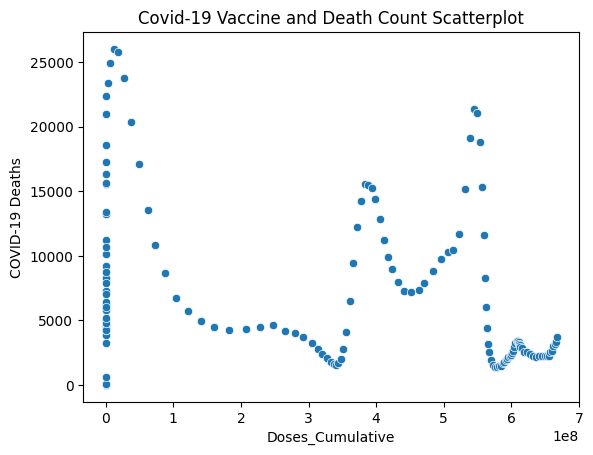

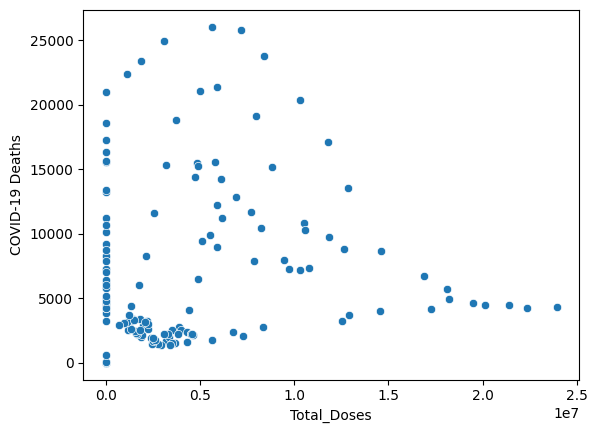

In [53]:
sns.scatterplot(merged_df, x= 'Doses_Cumulative', y= 'COVID-19 Deaths')
plt.title('Covid-19 Vaccine and Death Count Scatterplot')
plt.show()

sns.scatterplot(merged_df, x= 'Total_Doses', y= 'COVID-19 Deaths')
plt.show()

### TIME SERIES ANALYSIS OF COVID-19 DEATHS AND VACCINATION

In [43]:
url = 'https://raw.githubusercontent.com/carolinehagood/covid-project/refs/heads/main/data/merged_data.csv'
df = pd.read_csv(url)
df.tail()

,Start_Date,End_Date,Year,Week,COVID-19 Deaths,Total_Doses,Doses_Cumulative
152,2022-11-27,2022-12-03,2022,48.0,2599.0,2267466.0,659920383.0
153,2022-12-04,2022-12-10,2022,49.0,3042.0,2228895.0,662149278.0
154,2022-12-11,2022-12-17,2022,50.0,3194.0,2110617.0,664259895.0
155,2022-12-18,2022-12-24,2022,51.0,3325.0,1479730.0,665739625.0
156,2022-12-25,2022-12-31,2022,52.0,3668.0,1212616.0,666952241.0


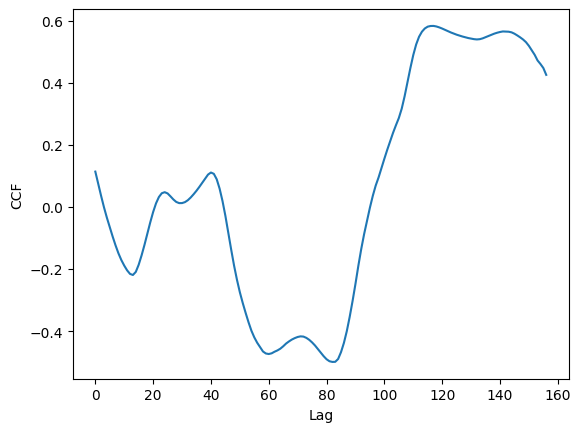

In [44]:
# Calculate the cross-correlation function (CCF)
ccf_result = ccf(df['COVID-19 Deaths'], df['Total_Doses'])

# Plot the CCF
plt.plot(ccf_result)
plt.xlabel('Lag')
plt.ylabel('CCF')
plt.show()

In [45]:
# Calculate Pearson's correlation coefficient and p-value
x = df['Doses_Cumulative']
y = df['COVID-19 Deaths']
corr_coefficient, p_value = pearsonr(x, y)

print(f"Pearson's correlation coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

Pearson's correlation coefficient: -0.24491531444789186
P-value: 0.001991613272597461


In [46]:
#Calculating Granger Causality
x = df['Total_Doses']
y = df['COVID-19 Deaths']
data = pd.DataFrame({'x': x, 'y': y})

max_lag = 5
grangercausalitytests(data, max_lag)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.6485  , p=0.0187  , df_denom=153, df_num=1
ssr based chi2 test:   chi2=5.7592  , p=0.0164  , df=1
likelihood ratio test: chi2=5.6555  , p=0.0174  , df=1
parameter F test:         F=5.6485  , p=0.0187  , df_denom=153, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.8986  , p=0.0582  , df_denom=150, df_num=2
ssr based chi2 test:   chi2=5.9905  , p=0.0500  , df=2
likelihood ratio test: chi2=5.8777  , p=0.0529  , df=2
parameter F test:         F=2.8986  , p=0.0582  , df_denom=150, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.3143  , p=0.0218  , df_denom=147, df_num=3
ssr based chi2 test:   chi2=10.4165 , p=0.0153  , df=3
likelihood ratio test: chi2=10.0793 , p=0.0179  , df=3
parameter F test:         F=3.3143  , p=0.0218  , df_denom=147, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.4748  , p=0.0470  

{1: ({'ssr_ftest': (5.6484592024030125, 0.018707540725972402, 153.0, 1),
   'ssr_chi2test': (5.759213304410914, 0.016402414243085955, 1),
   'lrtest': (5.655450006995125, 0.017401208908516097, 1),
   'params_ftest': (5.648459202403039, 0.018707540725972256, 153.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.898642239181002, 0.05819064220830057, 150.0, 2),
   'ssr_chi2test': (5.9905272943074035, 0.0500234368111398, 2),
   'lrtest': (5.877663496207788, 0.05292752531614417, 2),
   'params_ftest': (2.898642239181097, 0.058190642208295146, 150.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (3.3143373058773697, 0.021751934706087328, 147.0, 3),
   'ssr_chi2test': (10.41648867561459, 0.015338236487121624, 3),
   'lrtest': (10.07932637396516, 0.01790372895142397, 3),
   'params_ftest': (3.314337305882072, 0.02175193470595556, 147.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0.,